In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('raw_punks.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  int64 
 1   types                10000 non-null  object
 2   rarity               10000 non-null  int64 
 3   skin                 10000 non-null  object
 4   total_traits         10000 non-null  int64 
 5   traits               9992 non-null   object
 6   total_hidden_traits  10000 non-null  int64 
 7   hidden_traits        629 non-null    object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [4]:
df1[df1.traits.isnull()]

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
281,281,Male,7,Light,0,NaN,0,NaN
510,510,Male,9,Mid,0,NaN,0,NaN
641,641,Female,6,Light,0,NaN,0,NaN
741,741,Male,5,Dark,0,NaN,0,NaN
1050,1050,Female,8,Mid,0,NaN,0,NaN
2204,2204,Female,4,Dark,0,NaN,0,NaN
3307,3307,Male,3,Albino,0,NaN,0,NaN
6487,6487,Female,2,Albino,0,NaN,0,NaN


In [5]:
df1.fillna('',inplace=True)

In [6]:
df1.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,
2,2,Female,8090,Light,1,Wild Hair,0,
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,


In [7]:
df_types = df1.groupby('types').count().sort_values(by='id',ascending=False)

In [8]:
df_types

,id,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
types,,,,,,,
Male,6039,6039,6039,6039,6039,6039,6039
Female,3840,3840,3840,3840,3840,3840,3840
Zombie,88,88,88,88,88,88,88
Ape,24,24,24,24,24,24,24
Alien,9,9,9,9,9,9,9


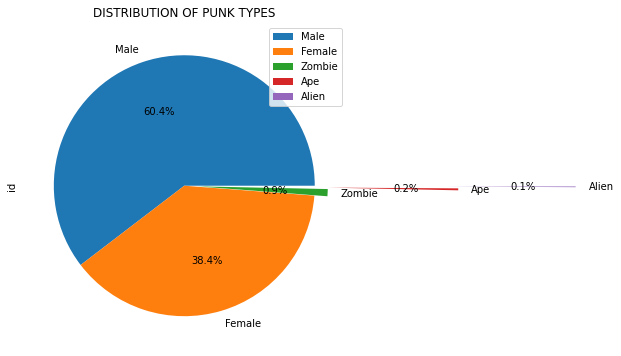

In [9]:
df_types.plot.pie(y='id',figsize=(6,6),explode=(0,0,0.1,1.1,2), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION OF PUNK TYPES')
plt.show()



In [10]:
df_humans = df1[(df1.types == 'Male') | (df1.types == 'Female')]
df_humans.head(3)

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,
2,2,Female,8090,Light,1,Wild Hair,0,


In [11]:
df_skin = df_humans.groupby('skin').count().sort_values(by='id',ascending=False)
df_skin

,id,types,rarity,total_traits,traits,total_hidden_traits,hidden_traits
skin,,,,,,,
Mid,3031,3031,3031,3031,3031,3031,3031
Light,3006,3006,3006,3006,3006,3006,3006
Dark,2824,2824,2824,2824,2824,2824,2824
Albino,1018,1018,1018,1018,1018,1018,1018


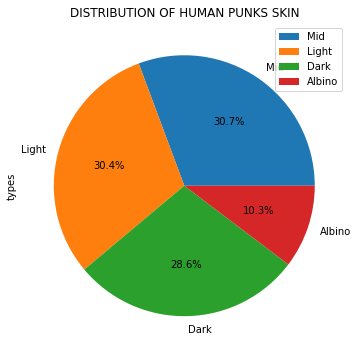

In [12]:
df_skin.plot.pie(y='types',figsize=(6,6),explode=(0,0,0,0), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION OF HUMAN PUNKS SKIN')
plt.show()

In [13]:
# cuantos Albinos hay entre hombres y Mujeres

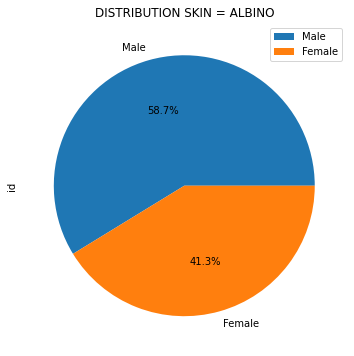

In [14]:
df_albinos = df_humans[df_humans.skin == 'Albino'].groupby('types').count().sort_values(by='id',ascending=False)
df_albinos.plot.pie(y='id',figsize=(6,6),explode=(0,0), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION SKIN = ALBINO')
plt.show()

In [15]:
# analizar punks en funcion de la rareza

In [16]:
df_punks_raros = df1.iloc[df1.rarity.sort_values().index]
df_punks_raros.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
8348,8348,Male,1,Mid,7,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",0,
6487,6487,Female,2,Albino,0,,0,
3307,3307,Male,3,Albino,0,,0,
2204,2204,Female,4,Dark,0,,0,
741,741,Male,5,Dark,0,,0,


In [17]:
df_top_punks_raros = df_punks_raros.reset_index(drop=True)[['id','rarity','types','skin','total_traits','total_hidden_traits','traits','hidden_traits']][:100]
df_top_punks_raros.head()

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",
1,6487,2,Female,Albino,0,0,,
2,3307,3,Male,Albino,0,0,,
3,2204,4,Female,Dark,0,0,,
4,741,5,Male,Dark,0,0,,


In [18]:
df_top_types = df_top_punks_raros.groupby('types').count().sort_values(by='total_traits',ascending=False)


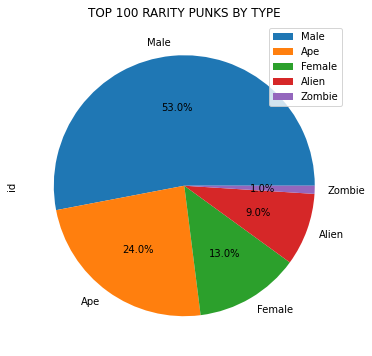

In [19]:
df_top_types.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY PUNKS BY TYPE')
plt.show()

In [20]:
df_top_skin = df_top_punks_raros.groupby('skin').count().sort_values(by='total_traits',ascending=False)


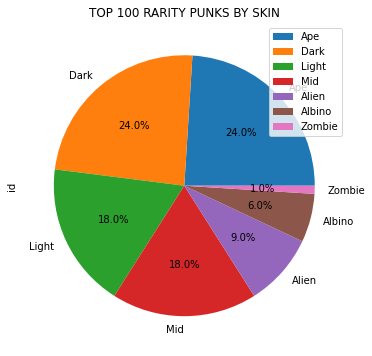

In [21]:
df_top_skin.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY PUNKS BY SKIN')

plt.show()

In [22]:
# analisis en funcion de los traits

In [23]:
df_top_punks_raros

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",
1,6487,2,Female,Albino,0,0,,
2,3307,3,Male,Albino,0,0,,
3,2204,4,Female,Dark,0,0,,
4,741,5,Male,Dark,0,0,,
...,...,...,...,...,...,...,...,...
95,8562,96,Male,Dark,2,0,"Beanie,Earring",
96,6472,97,Male,Light,2,0,"Beanie,Earring",
97,5684,98,Female,Dark,2,0,"Choker,Pilot Helmet",
98,5787,99,Female,Mid,4,0,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",


In [24]:
df_top_punks_raros.iloc[97]

id                                    5684
rarity                                  98
types                               Female
skin                                  Dark
total_traits                             2
total_hidden_traits                      0
traits                 Choker,Pilot Helmet
hidden_traits                             
Name: 97, dtype: object

In [25]:
tipos = {'Male':'human',
         'Female':'human',
         'Alien': 'rest',
         'Zombie':'rest',
         'Ape': 'rest'
        }


In [26]:
df_top_punks_raros['tipos']= df_top_punks_raros.types.map(tipos)

In [27]:
df_humanos = df_top_punks_raros[df_top_punks_raros.tipos == 'human']
df_rest = df_top_punks_raros[df_top_punks_raros.tipos == 'rest']

In [28]:
df_traits_h = df_humanos.groupby('total_traits').count().sort_values(by='id',ascending=False)
df_traits_h

,id,rarity,types,skin,total_hidden_traits,traits,hidden_traits,tipos
total_traits,,,,,,,,
2,24,24,24,24,24,24,24,24
3,15,15,15,15,15,15,15,15
6,11,11,11,11,11,11,11,11
0,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4
1,3,3,3,3,3,3,3,3
7,1,1,1,1,1,1,1,1


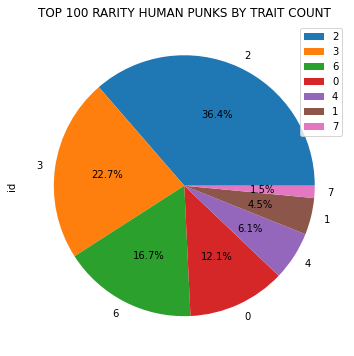

In [29]:
df_traits_h.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY HUMAN PUNKS BY TRAIT COUNT')

plt.show()

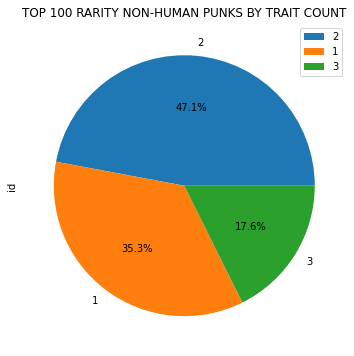

In [30]:
df_traits_rest = df_rest.groupby('total_traits').count().sort_values(by='id',ascending=False)
df_traits_rest.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY NON-HUMAN PUNKS BY TRAIT COUNT')

plt.show()

In [31]:
# cuantos punks tienen 7 atributos?
df_top_punks_raros[df_top_punks_raros.total_traits == 7]

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits,tipos
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",,human


In [32]:
# cuantos punks tienen 3 atributos ocultos?
df_top_punks_raros[df_top_punks_raros.total_hidden_traits == 3]

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits,tipos
25,5949,26,Female,Dark,6,3,"Big Shades,Earring,Medical Mask,Mole,Purple Li...","Earring,Mole,Lipstick",human


In [33]:
# analizamos por el atributo en particular 

In [34]:
df_top_punks_raros

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits,tipos
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",,human
1,6487,2,Female,Albino,0,0,,,human
2,3307,3,Male,Albino,0,0,,,human
3,2204,4,Female,Dark,0,0,,,human
4,741,5,Male,Dark,0,0,,,human
...,...,...,...,...,...,...,...,...,...
95,8562,96,Male,Dark,2,0,"Beanie,Earring",,human
96,6472,97,Male,Light,2,0,"Beanie,Earring",,human
97,5684,98,Female,Dark,2,0,"Choker,Pilot Helmet",,human
98,5787,99,Female,Mid,4,0,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",,human


In [35]:
df2 =df_top_punks_raros[['rarity','tipos','traits','types','hidden_traits']]
df2.head(10)

,rarity,tipos,traits,types,hidden_traits
0,1,human,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",Male,
1,2,human,,Female,
2,3,human,,Male,
3,4,human,,Female,
4,5,human,,Male,
5,6,human,,Female,
6,7,human,,Male,
7,8,human,,Female,
8,9,human,,Male,
9,10,rest,"Cowboy Hat,Earring",Alien,


In [36]:
# analysis por el tipo de trait
df2.traits

0     Big Beard,Buck Teeth,Cigarette,Classic Shades,...
1                                                      
2                                                      
3                                                      
4                                                      
                            ...                        
95                                       Beanie,Earring
96                                       Beanie,Earring
97                                  Choker,Pilot Helmet
98        Black Lipstick,Choker,Purple Eye Shadow,Tiara
99                                   Choker,Orange Side
Name: traits, Length: 100, dtype: object

In [37]:
#get traits 
def get_traits(dataframe,column):
    traits ={}
    for items in dataframe[column].str.split(','):
        for elem in items:        
            if len(elem) ==0:
                #print(type(elem))
                continue            
            if elem in traits:
                #print('exists, add one')
                traits[elem] += 1
            else:
                #print('not exist, create set to one ')
                traits[elem] = 1
    return traits
    

In [38]:
df_humans = df2[df2.tipos == 'human']
df_rest = df2[df2.tipos == 'rest']


In [39]:
df_rest.hidden_traits.values

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype=object)

In [40]:
columna = 'traits'
traits_humans = get_traits(df_humans,columna)
traits_rest = get_traits(df_rest,columna)


In [41]:
order_human_traits = dict(sorted(traits_humans.items(),key= lambda x:x[1],reverse=True))
df_traits_humans = pd.DataFrame(list(order_human_traits.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_top_humans = set (df_traits_humans.trait.values)
len(traits_top_humans),df_traits_humans.head()

(52,
                 trait  occurences
 0              Beanie          43
 1             Earring          22
 2           Cigarette           7
 3  Horned Rim Glasses           7
 4                Mole           6)

In [42]:
order_rest_traits = dict(sorted(traits_rest.items(),key= lambda x:x[1],reverse=True))
df_traits_rest = pd.DataFrame(list(order_rest_traits.items()),columns = ['trait','occurences'])
#df_traits_rest[df_traits_rest.occurences > 1]

traits_top_rest = set (df_traits_rest.trait.values)
len(traits_top_rest)

28

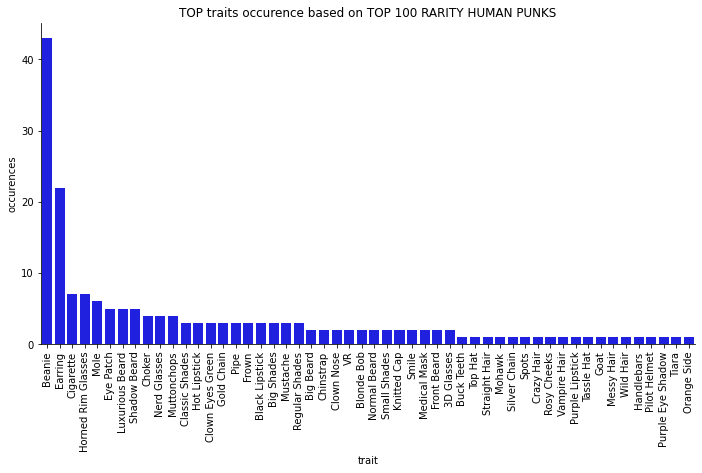

In [43]:
sns.catplot(x='trait',y='occurences',data= df_traits_humans,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('TOP traits occurence based on TOP 100 RARITY HUMAN PUNKS')
plt.xticks(rotation=90)
plt.show()

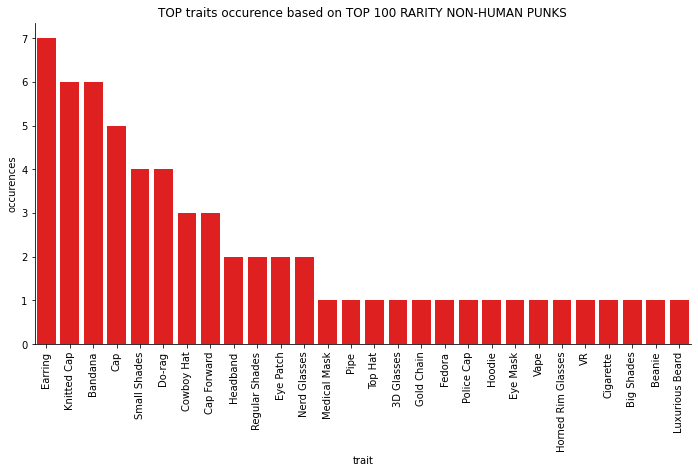

In [44]:
sns.catplot(x='trait',y='occurences',data= df_traits_rest,kind='bar',height=5, aspect=10/5,color='red')
plt.title('TOP traits occurence based on TOP 100 RARITY NON-HUMAN PUNKS')
plt.xticks(rotation=90)
plt.show()

In [45]:
top_rarity_traits= traits_top_rest.union(traits_top_humans)

In [46]:
columna = 'traits'
traits = get_traits(df1,columna)


In [47]:
order_traits = dict(sorted(traits.items(),key= lambda x:x[1],reverse=True))
df_traits = pd.DataFrame(list(order_traits.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_top = set (df_traits.trait.values)
len(traits_top)

89

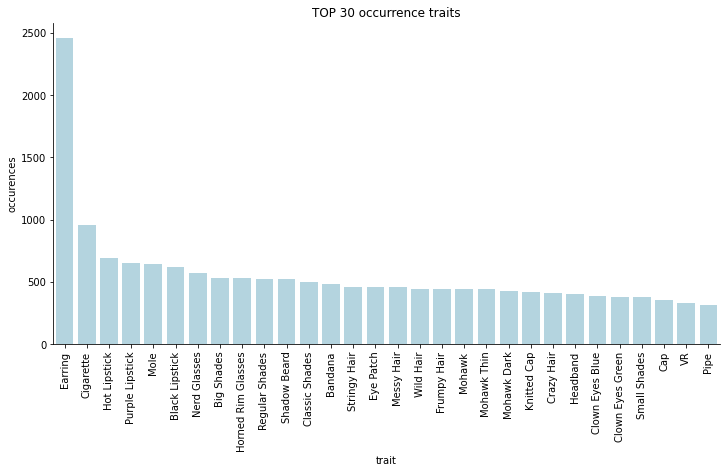

In [48]:
sns.catplot(x='trait',y='occurences',data= df_traits[:30],kind='bar',height=5, aspect=10/5,color='lightblue')
plt.title('TOP 30 occurrence traits')
plt.xticks(rotation=90)
plt.show()

In [49]:
top_30_traits_total = set(df_traits[:30].trait.unique())

In [50]:
group_traits = list(top_rarity_traits.difference(top_30_traits_total))

In [51]:
len(group_traits),group_traits

(38,
 ['Fedora',
  'Spots',
  'Hoodie',
  'Frown',
  'Muttonchops',
  'Eye Mask',
  'Vape',
  'Mustache',
  'Front Beard',
  'Straight Hair',
  'Pilot Helmet',
  'Medical Mask',
  'Clown Nose',
  'Chinstrap',
  'Luxurious Beard',
  'Handlebars',
  'Smile',
  'Police Cap',
  'Top Hat',
  'Buck Teeth',
  'Blonde Bob',
  'Silver Chain',
  'Cowboy Hat',
  'Gold Chain',
  'Rosy Cheeks',
  'Cap Forward',
  'Orange Side',
  'Vampire Hair',
  'Goat',
  'Tassle Hat',
  'Tiara',
  'Big Beard',
  '3D Glasses',
  'Choker',
  'Purple Eye Shadow',
  'Do-rag',
  'Beanie',
  'Normal Beard'])

In [52]:
df_traits_humans.head()

,trait,occurences
0,Beanie,43
1,Earring,22
2,Cigarette,7
3,Horned Rim Glasses,7
4,Mole,6


In [53]:
traits = get_traits(df2,'traits')

In [54]:
order_traits = dict(sorted(traits.items(),key= lambda x:x[1],reverse=True))
df_traits_new = pd.DataFrame(list(order_traits.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_top_new = set (df_traits_new.trait.values)
len(traits_top_new)

63

In [55]:
df_traits_new

,trait,occurences
0,Beanie,44
1,Earring,29
2,Cigarette,8
3,Knitted Cap,8
4,Horned Rim Glasses,8
...,...,...
58,Handlebars,1
59,Pilot Helmet,1
60,Purple Eye Shadow,1
61,Tiara,1


In [56]:
df_traits_new['keep']= df_traits_new['trait'].apply(lambda x: x in group_traits)

In [57]:
df_new = df_traits_new[df_traits_new.keep == True]

In [62]:
df_new.trait.values

array(['Beanie', 'Luxurious Beard', 'Do-rag', 'Choker', 'Gold Chain',
       'Muttonchops', 'Cowboy Hat', 'Medical Mask', 'Cap Forward',
       'Frown', 'Mustache', '3D Glasses', 'Big Beard', 'Top Hat',
       'Chinstrap', 'Clown Nose', 'Blonde Bob', 'Normal Beard', 'Smile',
       'Front Beard', 'Buck Teeth', 'Straight Hair', 'Silver Chain',
       'Spots', 'Rosy Cheeks', 'Vampire Hair', 'Tassle Hat', 'Goat',
       'Fedora', 'Police Cap', 'Hoodie', 'Eye Mask', 'Vape', 'Handlebars',
       'Pilot Helmet', 'Purple Eye Shadow', 'Tiara', 'Orange Side'],
      dtype=object)

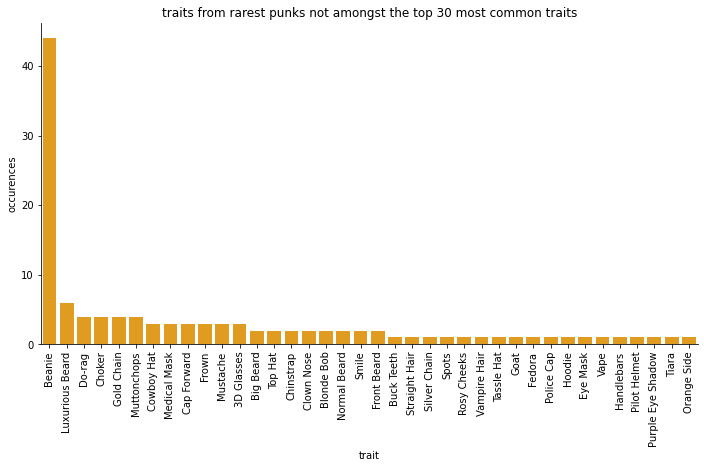

In [59]:
sns.catplot(x='trait',y='occurences',data= df_new,kind='bar',height=5, aspect=10/5,color='orange')
plt.title('traits from rarest punks not amongst the top 30 most common traits')
plt.xticks(rotation=90)
plt.show()

In [60]:
df_new

,trait,occurences,keep
0,Beanie,44,True
9,Luxurious Beard,6,True
15,Do-rag,4,True
16,Choker,4,True
17,Gold Chain,4,True
19,Muttonchops,4,True
21,Cowboy Hat,3,True
22,Medical Mask,3,True
23,Cap Forward,3,True
27,Frown,3,True
